# Sentiment Analyisis On Trumps Tweets
<p>The objectives of this project are:
<ol>
    <li>Extract twitter data using tweepy and pandas</li>
    <li>Statistics and visualizations with numpy, matplotlib and seaborn</li>
    <li>Sentimental analysis on tweets using textblob</li>
</ol>
</p>

<h3>Requirements</h3>
<ul>
    <li>Python3.6/2.7</li>
    <li>numpy</li>
    <li>pandas</li>
    <li>Matplotlib</li>
    <li>Seaborn</li>
    <li>Textblob</li>
</ul>

In [66]:
import matplotlib.pyplot as plt      #plotting
import numpy as np                    # number computation
import pandas as pd                   # Data Handling
import re                             # Regular expressions
import seaborn as sns                 #data visualization library based on matplotlib
import tweepy                         #twitter's API
import twitter_credentials            # this is a file that includes twitter creds
from IPython.display import display
from textblob import TextBlob


#print the graphs in the browser window
%matplotlib inline 

In [67]:
def twitter_setup():
    auth = tweepy.OAuthHandler(twitter_credentials.CONSUMER_KEY, twitter_credentials.CONSUMER_SECRET)
    auth.set_access_token(twitter_credentials.ACCESS_TOKEN, twitter_credentials.ACCESS_TOKEN_SECRET)
    api = tweepy.API(auth)
    return api

<h3>Tweet extraction</h3>

In [68]:
# call the function we had created
extractor = twitter_setup()
sname = "muoki_caleb"
# using the api we make a list of the latest 200 tweets py realDonaldTrump
tweets = extractor.user_timeline(screen_name=sname, count = 200)

print("Tweets Extracted: {}.\n".format(len(tweets)))

Tweets Extracted: 145.



<p>As expected we have extracted 200 tweets.<br/>
api.user_timeline() takes a couple of arguments in our case we specified the screen_name of the user we wanted if we hadn't it would have used our own username by default. We set the number of tweets to 200. by default the rate is lower than 200.<br/>
</p>
<p>We can print the first 10 tweets.</p>

In [69]:
# we can print the first 10 tweets
print("recent 10 tweeets")
for tweet in tweets[:10]:
    print(tweet.text)
    print()

recent 10 tweeets
RT @aina_akin: Very well said! https://t.co/2GcRD93MZy

Google, Apple ditch college degree requirements https://t.co/nRi9vsOAhJ

RT @KaraniJean: There are only two types of speakers the nervous ones and the liars ~ Mark Twain

RT @checkmatefc: Youh help out your bro here https://t.co/7YIchpdXJ0

RT @autumnbragwell: let’s settle this:
Does pineapple belong on pizza?
RT for yes                                                       Fav…

Talking about how good you are at cutting people off  must be the most loneliest/childish thing ever. 
Drop your eg… https://t.co/v4VhmyUWIM

Writing readable python code .

https://t.co/gH9HB6u9py

I was wrong about the Bluetooth connectivity .
thanks @ghollahkioko  for pointing it out.

Does anyone know or is part of an active Linux user group in Kenya ?

RT @linuxTheTux: How to reset a Windows password with Linux https://t.co/VxMSXIEcVc



<h3>Creating a Dataframe</h3>
Using a dataframe will enable us to easily manipulate data extracted.

In [70]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

#To display the first 10 tweets
display(data.head(10))




,Tweets,len,ID,Date,Source,Likes,RTs
0,RT @aina_akin: Very well said! https://t.co/2G...,54,1033418990490714112,2018-08-25 18:21:01,Twitter Lite,0,8
1,"Google, Apple ditch college degree requirement...",71,1032626200307478528,2018-08-23 13:50:46,Twitter Web Client,0,0
2,RT @KaraniJean: There are only two types of sp...,96,1032326023159984128,2018-08-22 17:57:58,Twitter Lite,0,3
3,RT @checkmatefc: Youh help out your bro here h...,68,1032242997398781952,2018-08-22 12:28:03,Twitter Lite,0,692
4,RT @autumnbragwell: let’s settle this:\nDoes p...,140,1031949769365757952,2018-08-21 17:02:52,Twitter Lite,0,247582
5,Talking about how good you are at cutting peop...,140,1031435046358589440,2018-08-20 06:57:32,Twitter Lite,6,0
6,Writing readable python code .\n\nhttps://t.co...,55,1031043759226724352,2018-08-19 05:02:42,Twitter Lite,0,0
7,I was wrong about the Bluetooth connectivity ....,89,1030794616252104704,2018-08-18 12:32:42,Twitter Lite,0,0
8,Does anyone know or is part of an active Linux...,68,1030403309998354432,2018-08-17 10:37:47,Twitter Lite,0,0
9,RT @linuxTheTux: How to reset a Windows passwo...,83,1030398708452651008,2018-08-17 10:19:30,Twitter Lite,0,1


## Visualization and statistics
<p>we can be able to get the mean length and most popular tweets. </p>

In [71]:
# mean

mean = np.mean(data['len'])
print("the mean length of the tweets is: {}".format(mean))

the mean length of the tweets is: 113.0551724137931


In [72]:
# extract tweets with  the most number of likes
favourite_max = np.max(data['Likes'])

favourite = data[data.Likes == favourite_max].index[0]

# max likes
print("Tweet with most number of likes is: \n{}".format(data['Tweets'][favourite]))
print("NUmber of likes: {}".format(favourite_max))
print("{} characters.\n".format(data['len'][favourite]))

Tweet with most number of likes is: 
The best decision I ever made was joining @KamiLimu . 
Dr @chao_mbogho  and company have positively changed my out… https://t.co/SpAhiFgR6x
NUmber of likes: 25
139 characters.



In [73]:
# Extract tweet with most number of retweets

retweet_max = np.max(data['RTs'])
retweets = data[data.RTs == retweet_max].index[0]

# max retweets
print("Tweet with most retweets is: \n{}".format(data['Tweets'][retweets]))
print("Number of retweets: {}".format(retweet_max))
print("{} characters.\n".format(data['len'][retweets]))

Tweet with most retweets is: 
RT @autumnbragwell: let’s settle this:
Does pineapple belong on pizza?
RT for yes                                                       Fav…
Number of retweets: 247582
140 characters.



<h3>Time series of the data</h3>

In [74]:
tweet_length = pd.Series(data=data['len'].values, index=data['Date'])
tweet_favourite = pd.Series(data=data['Likes'].values, index=data['Date'])
tweet_retweet = pd.Series(data=data['RTs'].values, index=data['Date'])

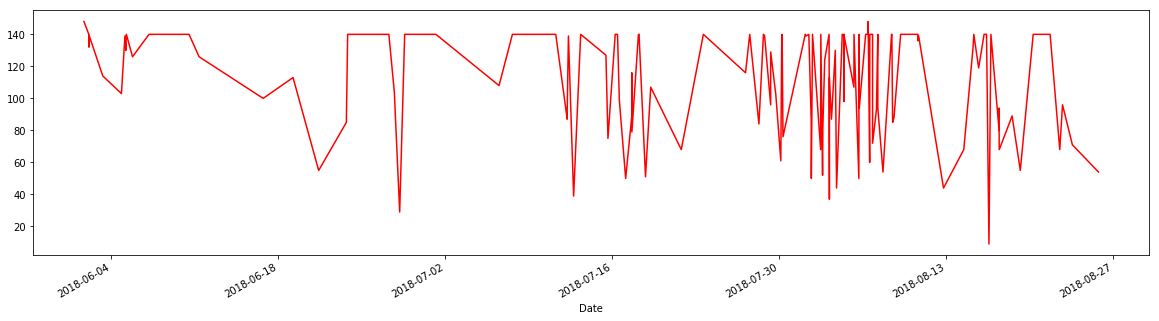

In [75]:
# plot of the length of tweets vs period of time
tweet_length.plot(figsize=(20,5),color='r')

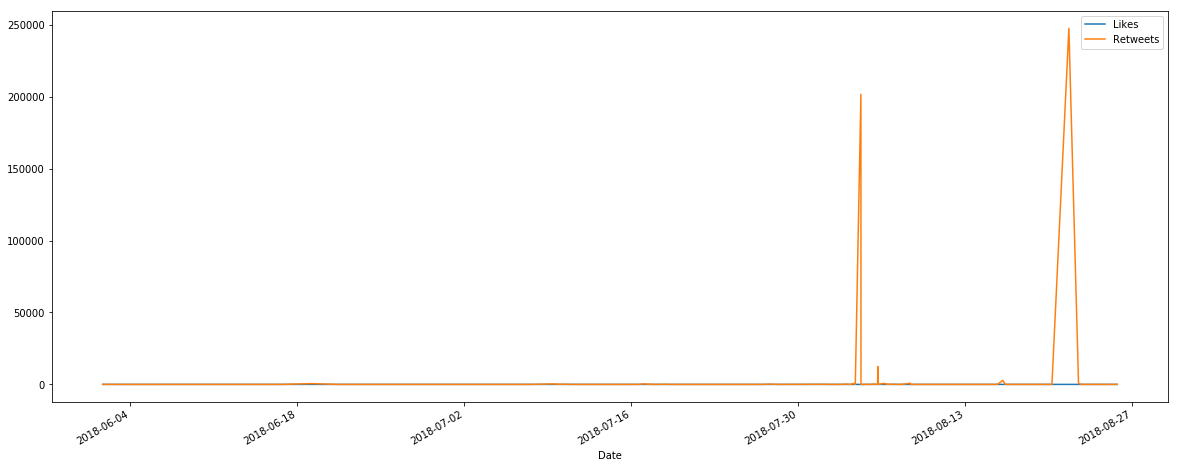

In [76]:
# likes and retweeets
tweet_favourite.plot(figsize=(20,8), label="Likes", legend=True)
tweet_retweet.plot(figsize=(20,8), label="Retweets", legend=True )

<p>We can see theat the more likes the more retweets. </p>
<p>It would be interesting to find out the sources from which the tweets come from. There is a high chance that if the tweets come from various sources there is more than one person tweeting the content or the user has more than one device.</p>

In [77]:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)
        
#print the sources
print("Content sources: ")
for source in sources:
    print("* {}".format(source))

Content sources: 
* Twitter Lite
* Twitter Web Client


<p>We can make a pie chart to visualize which source is most used</p>

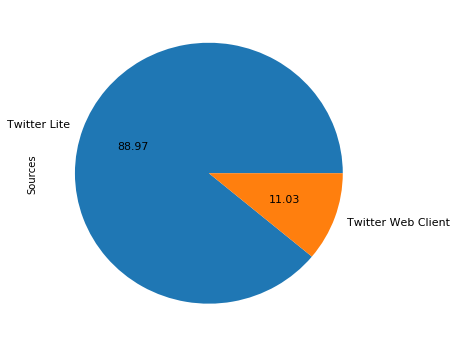

In [78]:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6))



## Sentiment Analysis


In [79]:
def clean_tweet(tweet):
    # removing linkss and special characters using regx
    return ''.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    # classify the polarity of a tweet using textblob.
    
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [80]:
# create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# display the updated dataframe with the new column:
display(data.head(10))


,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,RT @aina_akin: Very well said! https://t.co/2G...,54,1033418990490714112,2018-08-25 18:21:01,Twitter Lite,0,8,0
1,"Google, Apple ditch college degree requirement...",71,1032626200307478528,2018-08-23 13:50:46,Twitter Web Client,0,0,0
2,RT @KaraniJean: There are only two types of sp...,96,1032326023159984128,2018-08-22 17:57:58,Twitter Lite,0,3,0
3,RT @checkmatefc: Youh help out your bro here h...,68,1032242997398781952,2018-08-22 12:28:03,Twitter Lite,0,692,0
4,RT @autumnbragwell: let’s settle this:\nDoes p...,140,1031949769365757952,2018-08-21 17:02:52,Twitter Lite,0,247582,0
5,Talking about how good you are at cutting peop...,140,1031435046358589440,2018-08-20 06:57:32,Twitter Lite,6,0,0
6,Writing readable python code .\n\nhttps://t.co...,55,1031043759226724352,2018-08-19 05:02:42,Twitter Lite,0,0,0
7,I was wrong about the Bluetooth connectivity ....,89,1030794616252104704,2018-08-18 12:32:42,Twitter Lite,0,0,0
8,Does anyone know or is part of an active Linux...,68,1030403309998354432,2018-08-17 10:37:47,Twitter Lite,0,0,0
9,RT @linuxTheTux: How to reset a Windows passwo...,83,1030398708452651008,2018-08-17 10:19:30,Twitter Lite,0,1,0


In [81]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))



Percentage of positive tweets: 0.0%
Percentage of neutral tweets: 100.0%
Percentage de negative tweets: 0.0%


<p>It is important to note that we are only working with 200 recent tweets for more accurate results we need more data.</p>